# MechaGPT

## Setup and dependencies installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%bash
pip install --quiet --upgrade langchain langchain-community langchain-chroma layoutparser opencv-python torchvision pdf2img
python3 -m pip install -U 'git+https://github.com/facebookresearch/detectron2.git@ff53992b1985b63bd3262b5a36167098e3dada02'
pip install "layoutparser[ocr]"
git clone https://github.com/Layout-Parser/layout-parser.git
cd layout-parser/
sudo apt-get install poppler-utils
sudo apt-get install tesseract-ocr-eng
pip install -U 'git+https://github.com/nikhilweee/iopath'
pip install --upgrade Pillow
pip install Pillow==9.5.0
pip install google-api-core==1.34.0
pip install google-cloud-vision==2.10.0
pip install layoutparser[ocr]
pip install transformers==4.39.1

## Layoutparser testing with Meta's detectron2 models

In [ ]:
import layoutparser as lp
import cv2
from PIL import Image as im

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
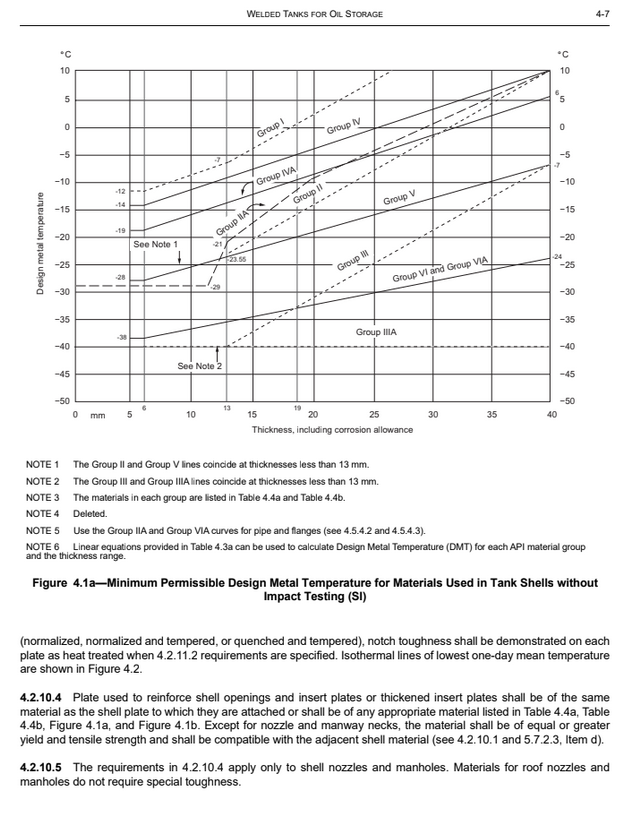

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Simulation_IA_24_25_JALALEDDIN_EL_FIRQI/Projet d'Intiation - MechaGPT/capture2.png")
image = image[..., ::-1]
image

In [ ]:
# Load the deep layout model from the layoutparser API
# For all the supported model, please check the Model
# Zoo Page: https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html

model3 = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

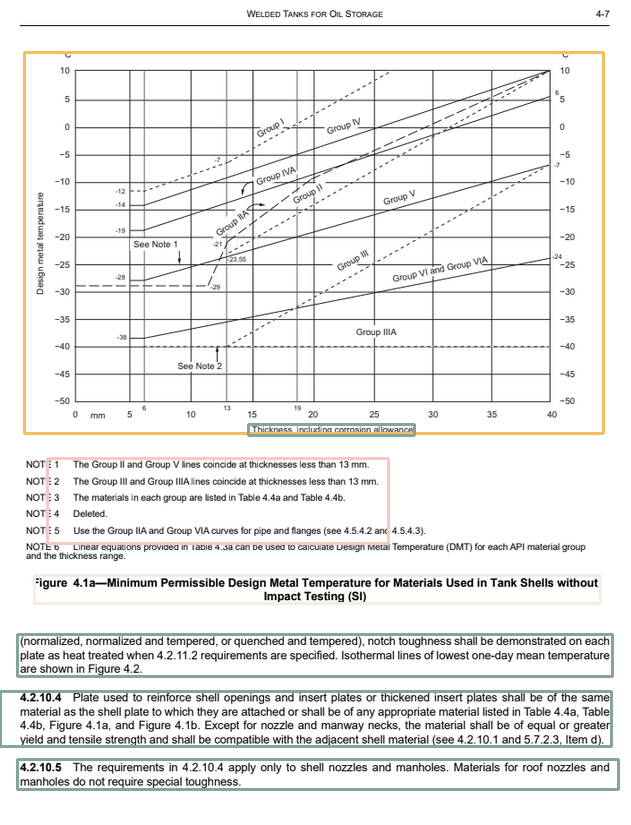

In [ ]:
# Detect the layout of the input image
layout3 = model3.detect(image)

sorted_layout3 = sorted(layout3, key=lambda x: x.coordinates[1])
lp.draw_box(image, layout3, box_width=3)

In [ ]:
# Initialize the tesseract ocr engine. You might need
ocr_agent = lp.TesseractAgent(languages='eng')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
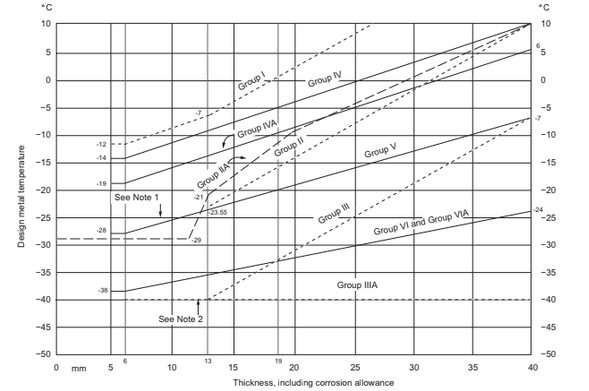

In [ ]:
# texts = []
# for block in sorted_layout3:
#   segment_image = (block.pad(left=5, right=5, top=5, bottom=5).crop_image(image))
#   if block.type == "Text" or block.type == "List" or block.type == "Title" or block.type == "Table":
#     texts.append(ocr_agent.detect(segment_image))
#   elif block.type == "Figure":
extracted_graph = sorted_layout3[0].pad(left=5, right=5, top=5, bottom=5).crop_image(image)
extracted_graph

In [ ]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image

processor = Pix2StructProcessor.from_pretrained('google/deplot')
model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')

image = Image.fromarray(extracted_graph)

inputs = processor(images=image, text="Generate description of the figure below:", return_tensors="pt")
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))

TITLE |  <0x0A> Design mark temperature | Thickness, including corrosion allowance <0x0A> Thickness, including corrosion allowance | -11.29 <0x0A> Group IIA | -10.11 <0x0A> Group IIA | -10.74 <0x0A> Group IV | -8.67 <0x0A> Group V | -10.03 <0x0A> Group V | -5.25 <0x0A> Total | 5.0 <0x0A> Group I | 0.00 <0x0A> Total | 0.00
